In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colNames = ['E','Ang','XS','XS_err']
# p2 = pd.read_table('rMatrix/24Mg_rMatrix_p2.dat',names=colNames)
p2 = pd.read_table('rMatrix/24Mg_rMatrix_p2_angInt.dat',names=colNames)

(0, 5000000000000000.0)

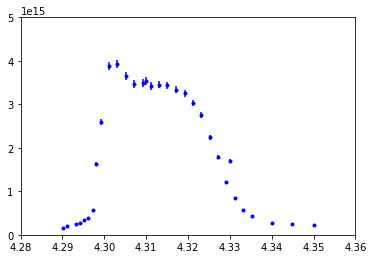

In [26]:
plt.errorbar(x=p2['E'],y=p2['XS'],yerr=p2['XS_err'],fmt='b.')
plt.xlim(4.28,4.36)
plt.ylim(0,.5e16)

# NO BG SUBTRACTION

In [29]:
# PLAY with TOP
top = 3.4e15
mid = top/2

epoints = np.linspace(4.25,4.375,1000)
topline = top*np.ones_like(epoints)
midline = mid*np.ones_like(epoints)




from scipy.interpolate import interp1d

f = interp1d(p2['E'],p2['XS'])

leftrange = np.linspace(4.295,4.305,1000)
yleft = f(leftrange)
rightrange = np.linspace(4.32,4.335,1000)
yright = f(rightrange)

def dist1d(points, ref):
    return np.abs(points - ref)

# left = 4.295
# right = 4.33
left = leftrange[np.where(dist1d(yleft,mid) == min(dist1d(yleft,mid)))]
leftline = left*np.ones_like(epoints)
right = rightrange[np.where(dist1d(yright,mid) == min(dist1d(yright,mid)))]
rightline = right*np.ones_like(epoints)

ypoints = np.linspace(0,7e15,len(epoints))



delta = (right-left)*1000 # keV

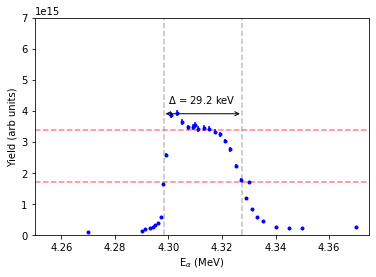

In [30]:
plt.errorbar(x=p2['E'],y=p2['XS'],yerr=p2['XS_err'],fmt='b.')
plt.xlim(4.25,4.375)
plt.ylim(0,.7e16)
plt.xlabel('E$_\\alpha$ (MeV)')
plt.ylabel('Yield (arb units)')

# arrow
plt.annotate(s='',
            xy=(left,top*1.15),
            xytext=(right,top*1.15),
            arrowprops=dict(arrowstyle="<->"))

# text
plt.text(x=(left+right)/2.006,y=1.25*top,s='$\\Delta$ = %.1f keV'%delta)

plt.plot(epoints,topline,c='r',alpha=.5,linestyle='dashed')
plt.plot(epoints,midline,c='r',alpha=.5,linestyle='dashed')

plt.plot(leftline,ypoints,c='grey',alpha=.5,linestyle='dashed')
plt.plot(rightline,ypoints,c='grey',alpha=.5,linestyle='dashed')

# LINEAR BG SUBTRACTION

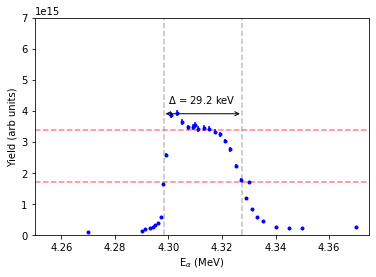

In [31]:
plt.errorbar(x=p2['E'],y=p2['XS'],yerr=p2['XS_err'],fmt='b.')
plt.xlim(4.25,4.375)
plt.ylim(0,.7e16)
plt.xlabel('E$_\\alpha$ (MeV)')
plt.ylabel('Yield (arb units)')

# arrow
plt.annotate(s='',
            xy=(left,top*1.15),
            xytext=(right,top*1.15),
            arrowprops=dict(arrowstyle="<->"))

# text
plt.text(x=(left+right)/2.006,y=1.25*top,s='$\\Delta$ = %.1f keV'%delta)

plt.plot(epoints,topline,c='r',alpha=.5,linestyle='dashed')
plt.plot(epoints,midline,c='r',alpha=.5,linestyle='dashed')

plt.plot(leftline,ypoints,c='grey',alpha=.5,linestyle='dashed')
plt.plot(rightline,ypoints,c='grey',alpha=.5,linestyle='dashed')

<ErrorbarContainer object of 3 artists>

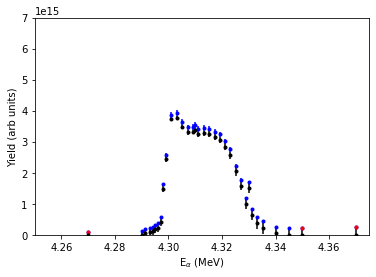

In [38]:
newp2 = p2.query('E < 4.28 or E > 4.345')

plt.xlim(4.25,4.375)
plt.ylim(0,.7e16)
plt.xlabel('E$_\\alpha$ (MeV)')
plt.ylabel('Yield (arb units)')
plt.errorbar(x=p2['E'],y=p2['XS'],yerr=p2['XS_err'],fmt='b.')
plt.errorbar(x=newp2['E'],y=newp2['XS'],yerr=newp2['XS_err'],fmt='r.')



f = interp1d(newp2['E'],newp2['XS'])

subvalues = f(p2['E'])

subbedp2 = p2.copy()
subbedp2['XS'] = subbedp2['XS']-subvalues
subbedp2['XS_err'] = subbedp2['XS_err']-subvalues
plt.errorbar(x=subbedp2['E'],y=subbedp2['XS'],yerr=subbedp2['XS_err'],fmt='k.')

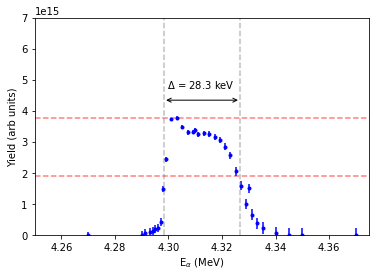

In [43]:
# PLAY with TOP
top = 3.78e15
# top = 3.3e15
mid = top/2

epoints = np.linspace(4.25,4.375,1000)
topline = top*np.ones_like(epoints)
midline = mid*np.ones_like(epoints)




from scipy.interpolate import interp1d

f = interp1d(p2['E'],p2['XS'])

leftrange = np.linspace(4.295,4.305,1000)
yleft = f(leftrange)
rightrange = np.linspace(4.32,4.335,1000)
yright = f(rightrange)

def dist1d(points, ref):
    return np.abs(points - ref)

# left = 4.295
# right = 4.33
left = leftrange[np.where(dist1d(yleft,mid) == min(dist1d(yleft,mid)))]
leftline = left*np.ones_like(epoints)
right = rightrange[np.where(dist1d(yright,mid) == min(dist1d(yright,mid)))]
rightline = right*np.ones_like(epoints)

ypoints = np.linspace(0,7e15,len(epoints))



delta = (right-left)*1000 # keV



plt.errorbar(x=subbedp2['E'],y=subbedp2['XS'],yerr=subbedp2['XS_err'],fmt='b.')
plt.xlim(4.25,4.375)
plt.ylim(0,.7e16)
plt.xlabel('E$_\\alpha$ (MeV)')
plt.ylabel('Yield (arb units)')

# arrow
plt.annotate(s='',
            xy=(left,top*1.15),
            xytext=(right,top*1.15),
            arrowprops=dict(arrowstyle="<->"))

# text
plt.text(x=(left+right)/2.006,y=1.25*top,s='$\\Delta$ = %.1f keV'%delta)

plt.plot(epoints,topline,c='r',alpha=.5,linestyle='dashed')
plt.plot(epoints,midline,c='r',alpha=.5,linestyle='dashed')

plt.plot(leftline,ypoints,c='grey',alpha=.5,linestyle='dashed')
plt.plot(rightline,ypoints,c='grey',alpha=.5,linestyle='dashed')